## Parametrizacion de hiperbolicos.

In [1]:
#paqueterias predefinidas de julia
using PyPlot
using SymPy
using TaylorSeries
using StaticArrays
using PyCall
using LaTeXStrings
using LinearAlgebra
using ForwardDiff

In [2]:
#importamos las implementaciones, del metodo de parametrizacion y del metodo de puntos fijos.
push!(LOAD_PATH,"/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM")
push!(LOAD_PATH,"/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM"
 "/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion"

In [3]:
# importamos los modulos locales.
using ParametrizacionMetodo
using PeriodicosSymmetries

┌ Info: Precompiling ParametrizacionMetodo [top-level]
└ @ Base loading.jl:1260


🔵 Definimos el mapeo

In [4]:
function EstandardMapK(r,k)
    x = r[1]
    y = r[2]
    vx = x + y - (k*sin(2*pi*x))/(2*pi)
    vy =  y - (k*sin(2*pi*x))/(2*pi)
    return [vx,vy]
end

EstandardMapK (generic function with 1 method)

In [5]:
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [y/2,y]
simetria4v(x,y) = [(y+1)/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x-(y/2)
simetria4f(x,y) = x-(y+1)/2.0


simetria4f (generic function with 1 method)

In [6]:
listasim1Y = [y for y in 0.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [y/2 for y in listasim1Y]
listasim4X = [(y+1.0)/2 for y in listasim1Y];

🔵 Definimos un mapeo para graficar el espacio fase para diferentes puntos. 

In [7]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #

    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])

        #x_ini = [F[1],F[2]]
        
       x = F[1]
       y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end

function GraficarEstandarMap(f)
    n = 50
    #s=2*pi/14.
    s = 1/20.
    i=0.
    for p_i=0:s:1
        for x_i =0:s:1
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
            
        end
    end

end

GraficarEstandarMap (generic function with 1 method)

In [8]:
function Estandar(x::Any,y::Any,k::Real)
    x_n =mod(x+y-k*sin(2*pi*x)/2pi,1)
    y_n =y-k*sin(2*pi*x)/2pi
    return [x_n,y_n]
end


Estandar (generic function with 1 method)

In [9]:
function EstandarI(x::Any, y::Any ,k::Real)
    x_n = mod(x-y,1)
    y_n = mod(y+k*sin(2pi*(x_n))/(2pi),1)
    return [x_n,y_n]
end


EstandarI (generic function with 1 method)

In [10]:
# GraficarEstandarMap(Estandar0)
# plot(listasim1X, listasim1Y, label = "")
# plot(listasim2X, listasim1Y, label = "")
# plot(listasim3X, listasim1Y, label = "")
# plot(listasim4X, listasim1Y, label = "")


🔵 Defino mapeos para ciertos valores del parámetro. 

In [11]:
Estandar0(x,y)=Estandar(x,y,0.0)
Estandar1(x,y)=Estandar(x,y,0.1)
Estandar2(x,y)=Estandar(x,y,0.2)
Estandar3(x,y)=Estandar(x,y,0.3)
Estandar4(x,y)=Estandar(x,y,0.4)
Estandar5(x,y)=Estandar(x,y,0.5)
Estandar6(x,y)=Estandar(x,y,0.6)
Estandar7(x,y)=Estandar(x,y,0.7)
Estandar8(x,y)=Estandar(x,y,0.8)
Estandar9(x,y)=Estandar(x,y,0.9)
Estandar10(x,y)=Estandar(x,y,0.93)
Estandar11(x,y)=Estandar(x,y,0.96)
Estandar12(x,y)=Estandar(x,y,1.0)
Estandar13(x,y)=Estandar(x,y,1.01)

Estandar13 (generic function with 1 method)

In [12]:
Estandar0I(x,y)=EstandarI(x,y,0.0)
Estandar1I(x,y)=EstandarI(x,y,0.1)
Estandar2I(x,y)=EstandarI(x,y,0.2)
Estandar3I(x,y)=EstandarI(x,y,0.3)
Estandar4I(x,y)=EstandarI(x,y,0.4)
Estandar5I(x,y)=EstandarI(x,y,0.5)
Estandar6I(x,y)=EstandarI(x,y,0.6)
Estandar7I(x,y)=EstandarI(x,y,0.7)
Estandar8I(x,y)=EstandarI(x,y,0.8)
Estandar9I(x,y)=EstandarI(x,y,0.9)
Estandar10I(x,y)=EstandarI(x,y,0.93)
Estandar11I(x,y)=EstandarI(x,y,0.96)
Estandar12I(x,y)=EstandarI(x,y,1.0)
Estandar13I(x,y)=EstandarI(x,y,1.01)

Estandar13I (generic function with 1 method)

In [13]:
EstandardMap1(x) = EstandardMapK(x,0.1)
EstandardMap2(x) = EstandardMapK(x,0.2)
EstandardMap3(x) = EstandardMapK(x,0.3)
EstandardMap4(x) = EstandardMapK(x,0.4)
EstandardMap5(x) = EstandardMapK(x,0.5)
EstandardMap6(x) = EstandardMapK(x,0.6)
EstandardMap7(x) = EstandardMapK(x,0.7)
EstandardMap8(x) = EstandardMapK(x,0.8)
EstandardMap9(x) = EstandardMapK(x,0.9)
EstandardMap10(x) = EstandardMapK(x,0.93)
EstandardMap11(x) = EstandardMapK(x,0.96)
EstandardMap12(x) = EstandardMapK(x,1.0)
EstandardMap13(x) = EstandardMapK(x,1.01)

EstandardMap13 (generic function with 1 method)

🔵 Buscamos el puntos de periodo dos que esta alrededor de 0.5 en y

In [14]:
periodo2E1 = periodicosN(EstandardMap1,simetria3v,simetria4f,1,0.5)
periodo2E2 = periodicosN(EstandardMap2,simetria3v,simetria4f,1,0.5)
periodo2E3 = periodicosN(EstandardMap3,simetria3v,simetria4f,1,0.5)
periodo2E4 = periodicosN(EstandardMap4,simetria3v,simetria4f,1,0.5)
periodo2E5 = periodicosN(EstandardMap5,simetria3v,simetria4f,1,0.5)
periodo2E6 = periodicosN(EstandardMap6,simetria3v,simetria4f,1,0.5)
periodo2E7 = periodicosN(EstandardMap7,simetria3v,simetria4f,1,0.5)
periodo2E8 = periodicosN(EstandardMap8,simetria3v,simetria4f,1,0.5)
periodo2E9 = periodicosN(EstandardMap9,simetria3v,simetria4f,1,0.5)
periodo2E10 = periodicosN(EstandardMap10,simetria3v,simetria4f,1,0.5)
periodo2E11 = periodicosN(EstandardMap11,simetria3v,simetria4f,1,0.5)
periodo2E12 = periodicosN(EstandardMap12,simetria3v,simetria4f,1,0.5)
periodo2E13 = periodicosN(EstandardMap13,simetria3v,simetria4f,1,0.5);

In [15]:
listaper21 = iterar(EstandardMap1,periodo2E1,2,1);
listaper22 = iterar(EstandardMap2,periodo2E2,2,1);
listaper23 = iterar(EstandardMap3,periodo2E3,2,1);
listaper24 = iterar(EstandardMap4,periodo2E4,2,1);
listaper25 = iterar(EstandardMap5,periodo2E5,2,1);
listaper26 = iterar(EstandardMap6,periodo2E6,2,1);
listaper27 = iterar(EstandardMap7,periodo2E7,2,1);
listaper28 = iterar(EstandardMap8,periodo2E8,2,1);
listaper29 = iterar(EstandardMap9,periodo2E9,2,1);
listaper210 = iterar(EstandardMap10,periodo2E10,2,1);
listaper211 = iterar(EstandardMap11,periodo2E11,2,1);
listaper212 = iterar(EstandardMap12,periodo2E12,2,1);
listaper213 = iterar(EstandardMap13,periodo2E13,2,1);

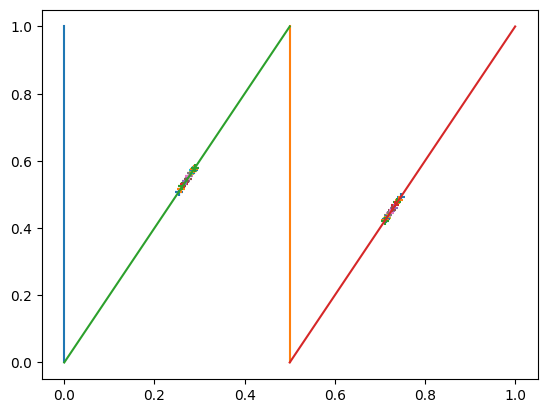

In [16]:
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")
scatter(listaper21[1],listaper21[2],marker ="+")
scatter(listaper22[1],listaper22[2],marker ="+")
scatter(listaper23[1],listaper23[2],marker ="+")
scatter(listaper24[1],listaper24[2],marker ="+")
scatter(listaper25[1],listaper25[2],marker ="+")
scatter(listaper26[1],listaper26[2],marker ="+")
scatter(listaper27[1],listaper27[2],marker ="+")
scatter(listaper28[1],listaper28[2],marker ="+")
scatter(listaper29[1],listaper29[2],marker ="+")
scatter(listaper210[1],listaper210[2],marker ="+")
scatter(listaper211[1],listaper211[2],marker ="+")
scatter(listaper212[1],listaper212[2],marker ="+")
scatter(listaper213[1],listaper213[2],marker ="+")
savefig("estandarp2k1_13.pdf", dpi=300)

🔵 Queremos ver como son las variedades de estos puntos. 

In [17]:
using TaylorSeries
using StaticArrays
using PyCall
using LaTeXStrings

In [34]:
compo80(x,y) = composition(Estandar1,80)(x,y)

compo80 (generic function with 1 method)

In [36]:
Estandar1c2(x,y) = composition(EstandardMap1,3)(x,y)
#EstandarI1c2(x,y) = composition(Estandar1,3)(x,y)

Estandar1c2 (generic function with 1 method)

In [37]:
Estandar1c2(1,1)

MethodError: [91mMethodError: no method matching EstandardMap1(::Int64, ::Int64)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  EstandardMap1(::Any) at In[13]:1[39m

In [23]:
Orden = 10
tiempo = [0.0,0.04]
delta_t = 0.001
Wu1,fu1,vecu1,valu1 = Inestable(Estandar1, Orden , periodo2E1, tiempo, delta_t);
Ws1,fs1,vecs1,vals1 = Inestable(Estandar1I, Orden , periodo2E1, tiempo, delta_t); 
Wu1a,fu1a,vecu1a,valu1a = Inestable(Estandar1,Orden , EstandardMap1(periodo2E1), tiempo, delta_t);
Ws1a,fs1a,vecs1a,vals1a = Inestable(Estandar1I, Orden , EstandardMap1(periodo2E1), tiempo, delta_t); 

In [26]:
Orden = 10
tiempo = [0.0,0.04]
delta_t = 0.001
Wu1,fu1,vecu1,valu1 = Inestable(Estandar1c2, Orden , periodo2E1, tiempo, delta_t);
# Ws1,fs1,vecs1,vals1 = Inestable(Estandar1Ic2, Orden , periodo2E1, tiempo, delta_t); 
# Wu1a,fu1a,vecu1a,valu1a = Inestable(Estandar1,Orden , EstandardMap1(periodo2E1), tiempo, delta_t);
# Ws1a,fs1a,vecs1a,vals1a = Inestable(Estandar1I, Orden , EstandardMap1(periodo2E1), tiempo, delta_t); 

MethodError: [91mMethodError: no method matching Estandar1(::Array{Taylor1{TaylorN{Float64}},1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  Estandar1(::Any, [91m::Any[39m) at In[11]:2[39m

In [19]:
function evaluar(A,Tiempo,paso,PuntoFijo,col)
    ValX=Float64[]
    ValY=Float64[]
    for t = Tiempo[1]:paso:Tiempo[2]
        x = A[1](t)
        y = A[2](t)
        push!(ValX,mod(x,1))
        push!(ValY,y)
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    title("espacio fase")
    xlabel(L"x")
    ylabel(L"y")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

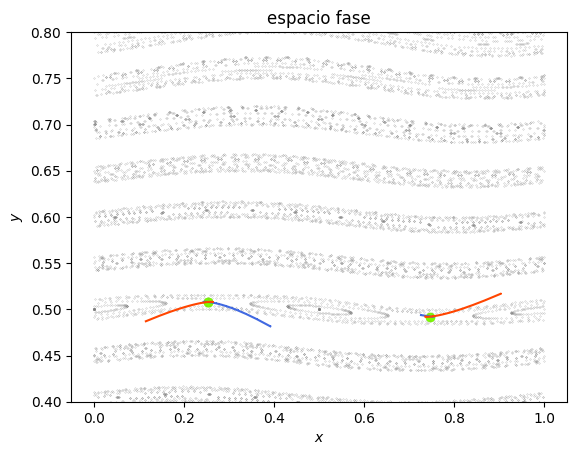

(0.4, 0.8)

In [20]:
evaluar(Wu1, [-0.027,0.027],2.0e-3,periodo2E1,"royalblue")
evaluar(Ws1, [-0.027,0.027],2.0e-3,periodo2E1,"orangered")
evaluar(Wu1a, [-0.0285,0.03101],2.0e-2,EstandardMap1(periodo2E1),"royalblue")
evaluar(Ws1a, [-0.028,0.028],2.0e-3,EstandardMap1(periodo2E1),"orangered")
scatter(listaper21[1],listaper21[2],marker ="o",color="lawngreen")
GraficarEstandarMap(Estandar1)
ylim(0.4,0.8)

In [21]:
Wu1b = EstandardMap1(Wu1)
Ws1b = EstandardMap1(Ws1);

In [22]:
Wu1c = EstandardMap1(Wu1b)
Ws1c = EstandardMap1(Ws1b);

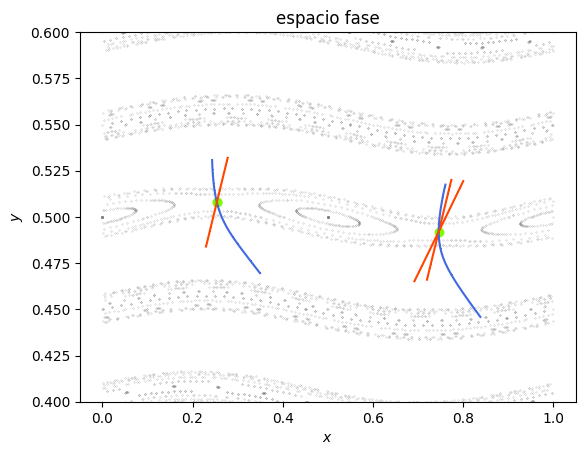

(0.4, 0.6)

In [52]:
evaluar(Wu1, [-0.024,0.024],2.0e-3,periodo2E1,"royalblue")
evaluar(Ws1, [-0.024,0.024],2.0e-3,periodo2E1,"orangered")
#evaluar(Wu1a, [-0.031,0.01],2.0e-2,EstandardMap1(periodo2E1),"royalblue")
evaluar(Ws1a, [-0.028,0.027],2.0e-3,EstandardMap1(periodo2E1),"orangered")
evaluar(Wu1b, [-0.027,0.027],2.0e-3,periodo2E1,"royalblue")
evaluar(Ws1b, [-0.027,0.027],2.0e-3,periodo2E1,"orangered")
#evaluar(Ws1c,[-0.027,0.027],2.0e-3,EstandardMap1(periodo2E1),"royalblue")
#evaluar(Ws1c, [-0.027,0.027],2.0e-4,EstandardMap1(periodo2E1),"orangered")
scatter(listaper21[1],listaper21[2],marker ="o",color="lawngreen")
GraficarEstandarMap(Estandar1)
ylim(0.4,0.6)

In [46]:
function Estandar(x::Any,y::Any,k::Real)
    x_n =mod(x+y-k*sin(2*pi*x)/2pi,1)
    y_n =y-k*sin(2*pi*x)/2pi
    return [x_n,y_n]
end
Estandar2(x,y)=Estandar(x,y,0.2)

Estandar2 (generic function with 1 method)

In [24]:
Orden = 170
tiempo = [0.0,0.04]
delta_t = 0.001
Wu2,fu2,vecu2,valu2 = Inestable(Estandar2, Orden , periodo2E2, tiempo, delta_t);
Ws2,fs2,vecs2,vals2 = Inestable(Estandar2I, Orden , periodo2E2, tiempo, delta_t); 
Wu2a,fu2a,vecu1a,valu2a = Inestable(Estandar2,Orden , EstandardMap2(periodo2E2), tiempo, delta_t);
Ws2a,fs2a,vecs1a,vals2a = Inestable(Estandar2I, Orden , EstandardMap2(periodo2E2), tiempo, delta_t); 

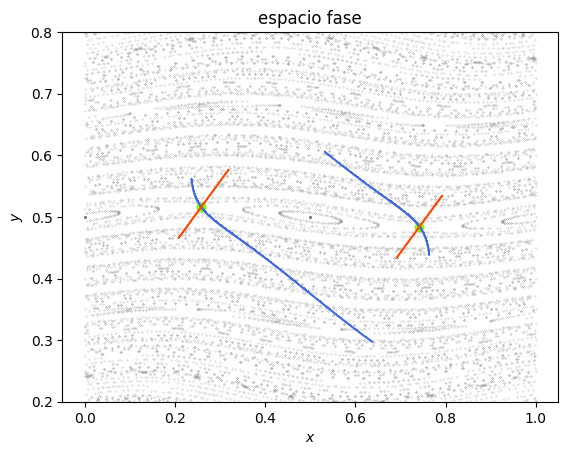

(0.2, 0.8)

In [76]:
evaluar(Wu2, [-0.06,0.05],2.0e-4,periodo2E2,"royalblue")
evaluar(Ws2, [-0.06,0.05],2.0e-4,periodo2E2,"orangered")
evaluar(Wu2a, [-0.05,0.05],2.0e-4,EstandardMap1(periodo2E2),"royalblue")
evaluar(Ws2a, [-0.05,0.05],2.0e-4,EstandardMap1(periodo2E2),"orangered")
scatter(listaper22[1],listaper22[2],marker ="o",color="lawngreen")
GraficarEstandarMap(Estandar2)
ylim(0.2,0.8)

In [88]:
delta_t = 0.001
ErrorU2 = CalculoError(Estandar2,1.0, Wu2,fu2,[-0.42,0.42],delta_t);
ErrorS2 = CalculoError(Estandar2,1.0, Ws2,fs2,[-0.42,0.42],delta_t);

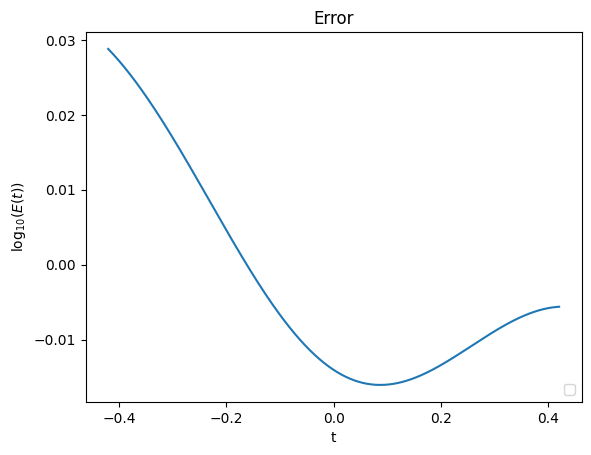

No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7f3d2cf013a0>

In [91]:


plot(ErrorS2[1],log10.(ErrorS2[2]),marker= "None")
#plot(ErrorU2[1],log10.(ErrorU2[2]),marker= "None")
#plot(ErrorU29[1],log10.(ErrorU29[2]),marker= "None", color="royalblue")
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [26]:
Estandar1I(x,y) = EstandarI(x,y,0.1)

Estandar1I (generic function with 1 method)

In [27]:
Wu1a,fu1a,vecu1a,valu1a = Inestable(Estandar1,190 , EstandardMap1(periodo2E1), tiempo, delta_t);
Ws1a,fs1a,vecs1a,vals1a = Inestable(Estandar1I, 170 , EstandardMap1(periodo2E1), tiempo, delta_t);

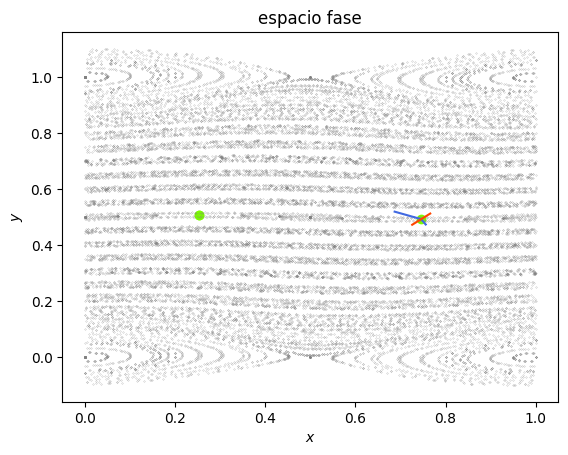

In [28]:
evaluar(Wu1a, [-0.02,0.02],2.0e-2,EstandardMap1(periodo2E1),"royalblue")
evaluar(Ws1a, [-0.02,0.02],2.0e-3,EstandardMap1(periodo2E1),"orangered")
scatter(listaper21[1],listaper21[2],marker ="o",color="lawngreen")
GraficarEstandarMap(Estandar1)

🔵 Parece que necesitamos más presición.

In [29]:
simetria1vBF(x,y) = [BigFloat(0.0),y]
simetria2vBF(x,y) = [BigFloat(1/2.0),y]
simetria3vBF(x,y) = [y/BigFloat(2.0),y]
simetria4vBF(x,y) = [(y+BigFloat(1.0))/BigFloat(2.0),y]
simetria1fBF(x,y) = x
simetria2fBF(x,y) = x-BigFloat(1/2.0)
simetria3fBF(x,y) = x-(y/BigFloat(2.0))
simetria4fBF(x,y) = x-(y+BigFloat(1.0))/BigFloat(2.0)

simetria4fBF (generic function with 1 method)

In [30]:
function EstandardMapKBF(r,k)
    x = r[1]
    y = r[2]
    vx = x + y - (k*sin(BigFloat(2*pi)*x))/BigFloat(2*pi)
    vy =  y - (k*sin(BigFloat(2*pi)*x))/BigFloat(2*pi)
    return [vx,vy]
end

EstandardMapKBF (generic function with 1 method)

In [31]:
function EstandarBF(x::Any,y::Any,k::Real)
    x_n =mod(x+y-(k*sin(BigFloat(2*pi)*x))/BigFloat(2pi),1)
    y_n =mod(y-(k*sin(BigFloat(2*pi)*x))/BigFloat(2pi),1)
    return [x_n,y_n]
end

EstandarBF (generic function with 1 method)

In [32]:
function EstandarIBF(x::Any, y::Any ,k::Real)
    x_n = mod(x-y,1)
    y_n = mod(y+k*sin(BigFloat(2pi)*(x_n))/BigFloat(2pi),1)
    return [x_n,y_n]
end


EstandarIBF (generic function with 1 method)

In [33]:
#esta es la que sirve para calcular puntos periodicos
EstandardMap1BF(x) = EstandardMapK(x,BigFloat(0.3))

EstandardMap1BF (generic function with 1 method)

In [34]:
periodo2E1BF = periodicosN(EstandardMap1BF,simetria3vBF,simetria4fBF,1,BigFloat(0.5))

2-element Array{BigFloat,1}:
 0.2619032519815713709079689069883851460681111299876043994976402856341518188218695
 0.5238065039631427418159378139767702921362222599752087989952805712683036376437391

In [35]:
listaper21BF = iterar(EstandardMap1BF,periodo2E1BF,6,1);

In [36]:
#estas son las que sirven para calcular las variedades.
Estandar1BF(x,y) = EstandarBF(x,y,BigFloat(0.3))
Estandar1IBF(x,y) = EstandarIBF(x,y,BigFloat(0.3))

Estandar1IBF (generic function with 1 method)

In [37]:
tiempo1 =[BigFloat(0.0), BigFloat(1.0)]
delta_t = BigFloat(0.2);

In [38]:
Wu1BF,fu1BF,vecu1BF,valu1BF = Inestable(Estandar1BF, 190 , periodo2E1BF, tiempo1, delta_t);
Ws1BF,fs1BF,vecs1BF,vals1BF = Inestable(Estandar1IBF, 70 , periodo2E1BF, tiempo1, delta_t);

In [39]:
Wu1BFa,fu1BFa,vecu1BFa,valu1BFa = Inestable(Estandar1BF, 190 , EstandardMap1BF(periodo2E1BF), tiempo1, delta_t);
Ws1BFa,fs1BFa,vecs1BFa,vals1BFa = Inestable(Estandar1IBF, 70 , EstandardMap1BF(periodo2E1BF), tiempo1, delta_t);

🔵 Parece que la presicion extendida no ayuda mucho.

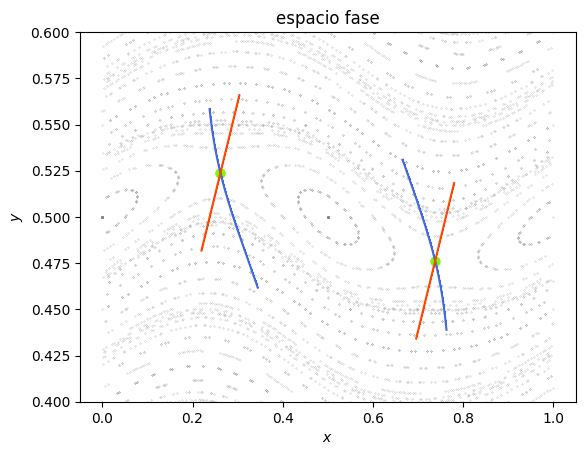

(0.4, 0.6)

In [40]:
x1 = BigFloat(-0.042)
x2 = BigFloat(0.039)
x3 = BigFloat(-0.042)
x4 = BigFloat(0.042)
delta1 = BigFloat(2.0e-4)
GraficarEstandarMap(Estandar3)
evaluar(Wu1BF, [x1,x2],delta1,periodo2E1BF,"royalblue")
evaluar(Ws1BF, [x3,x4],delta1,periodo2E1BF,"orangered")
evaluar(Wu1BFa, [x1,x2],delta1,EstandardMap1BF(periodo2E1BF),"royalblue")
evaluar(Ws1BFa, [x3,x4],delta1,EstandardMap1BF(periodo2E1BF),"orangered")
scatter(listaper21BF[1],listaper21BF[2],marker ="o",color="lawngreen")
ylim(0.4,0.6)

📘 Que pasa si usamos en lugar del mapeo el mapeo iterado. 

In [91]:
Estandar1BF2(x,y) = composition(Estandar1BF,2)(x,y)
Estandar1IBF2(x,y) = composition(Estandar1IBF,2)(x,y)

Estandar1IBF2 (generic function with 1 method)

In [92]:
Wu1BF,fu1BF,vecu1BF,valu1BF = Inestable(Estandar1BF, 190 , periodo2E1BF, tiempo1, delta_t)
Ws1BF,fs1BF,vecs1BF,vals1BF = Inestable(Estandar1IBF, 70 , periodo2E1BF, tiempo1, delta_t);

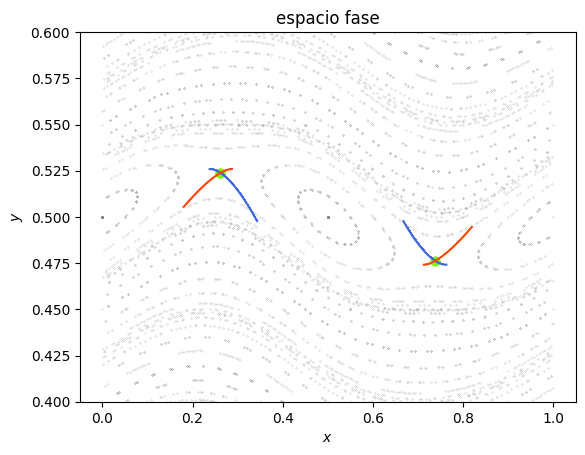

(0.4, 0.6)

In [93]:
x1 = BigFloat(-0.042)
x2 = BigFloat(0.039)
x3 = BigFloat(-0.042)
x4 = BigFloat(0.042)
delta1 = BigFloat(2.0e-4)
GraficarEstandarMap(Estandar3)
evaluar(Wu1BF, [x1,x2],delta1,periodo2E1BF,"royalblue")
evaluar(Ws1BF, [x3,x4],delta1,periodo2E1BF,"orangered")
evaluar(Wu1BFa, [x1,x2],delta1,EstandardMap1BF(periodo2E1BF),"royalblue")
evaluar(Ws1BFa, [x3,x4],delta1,EstandardMap1BF(periodo2E1BF),"orangered")
scatter(listaper21BF[1],listaper21BF[2],marker ="o",color="lawngreen")
ylim(0.4,0.6)

🔵 Que pasa si iteramos las variedades que tenemos bajo el mapeo.

In [89]:
Wu1BFA =  EstandardMap1BF(Wu1BF)
Ws1BFA =  EstandardMap1BF(Ws1BF);
Wu1BFaA = EstandardMap1BF(Wu1BFa)
Ws1BFaA = EstandardMap1BF(Ws1BFa);

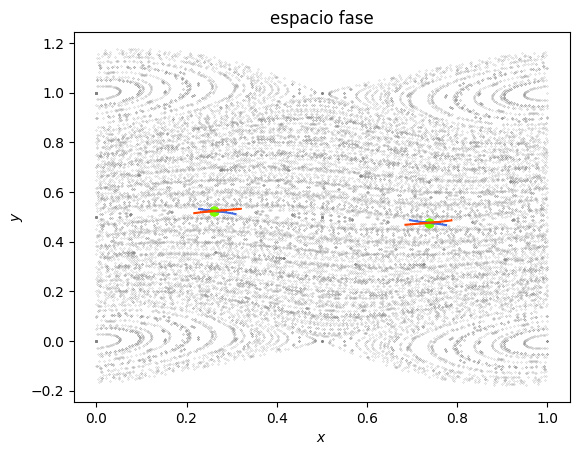

In [90]:
x1 = BigFloat(-0.03)
x2 = BigFloat(0.03)
x3 = BigFloat(-0.031)
x4 = BigFloat(0.031)
delta1 = BigFloat(2.0e-3)
GraficarEstandarMap(Estandar3)
evaluar(Wu1BFA, [x1,x2],delta1,periodo2E1BF,"royalblue")
evaluar(Ws1BFA, [x3,x4],delta1,periodo2E1BF,"orangered")
evaluar(Wu1BFa, [x1,x2],delta1,EstandardMap1BF(periodo2E1BF),"royalblue")
evaluar(Ws1BFa, [x3,x4],delta1,EstandardMap1BF(periodo2E1BF),"orangered")
evaluar(Wu1BF, [x1,x2],delta1,periodo2E1BF,"royalblue")
evaluar(Ws1BF, [x3,x4],delta1,periodo2E1BF,"orangered")
evaluar(Wu1BFaA, [x1,x2],delta1,EstandardMap1BF(periodo2E1BF),"royalblue")
evaluar(Ws1BFaA, [x3,x4],delta1,EstandardMap1BF(periodo2E1BF),"orangered")
scatter(listaper21BF[1],listaper21BF[2],marker ="o",color="lawngreen")
savefig("estandar01kvar.pdf", dpi=300)

🔵 Parece que solo pasan de un punto periodico a otro, pero no gano nada en terminos de dominio.

❤ Veamos con otro valor del parametro.

In [43]:
EstandardMap2BF(x) = EstandardMapK(x,BigFloat(0.2))

EstandardMap2BF (generic function with 1 method)

In [44]:
periodo2E2BF = periodicosN(EstandardMap2BF,simetria3vBF,simetria4fBF,1,BigFloat(0.5))

2-element Array{BigFloat,1}:
 0.2579478268178788359524174756373329605595990189841026970797171511958835416335917
 0.5158956536357576719048349512746659211191980379682053941594343023917670832671834

In [45]:
listaper22BF = iterar(EstandardMap2BF,periodo2E2BF,4,1);

In [46]:
Estandar2BF(x,y) = EstandarBF(x,y,BigFloat(0.2))
Estandar2IBF(x,y) = EstandarIBF(x,y,BigFloat(0.2))

Estandar2IBF (generic function with 1 method)

In [47]:
tiempo1 =[BigFloat(0.0), BigFloat(1.0)]
delta_t = BigFloat(0.2);
Wu2BF,fu2BF,vecu2BF,valu2BF = Inestable(Estandar2BF, 190 , periodo2E2BF, tiempo1, delta_t);
Ws2BF,fs2BF,vecs2BF,vals2BF = Inestable(Estandar2IBF, 70 , periodo2E2BF, tiempo1, delta_t);
Wu2BFa,fu2BFa,vecu2BFa,valu2BFa = Inestable(Estandar2BF, 190 , EstandardMap2BF(periodo2E2BF), tiempo1, delta_t);
Ws2BFa,fs2BFa,vecs2BFa,vals2BFa = Inestable(Estandar2IBF, 70 , EstandardMap2BF(periodo2E2BF), tiempo1, delta_t);

In [48]:
Wu2BFA =  EstandardMap2BF(Wu2BF)
Ws2BFA =  EstandardMap2BF(Ws2BF);
Wu2BFaA = EstandardMap2BF(Wu2BFa)
Ws2BFaA = EstandardMap2BF(Ws2BFa);

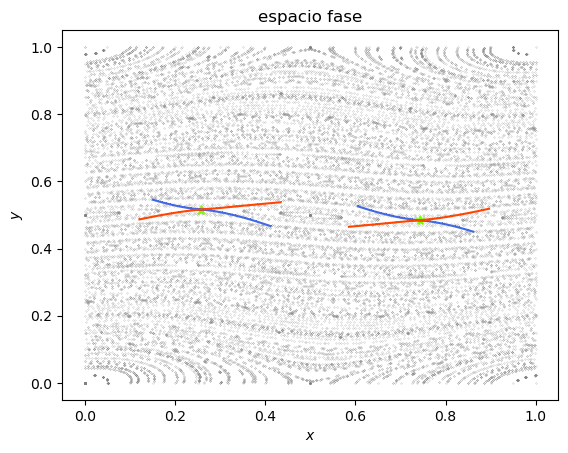

In [49]:
x1 = BigFloat(-0.045)
x2 = BigFloat(0.045)
x3 = BigFloat(-0.045)
x4 = BigFloat(0.045)
delta1 = BigFloat(2.0e-3)
GraficarEstandarMap(Estandar2)
evaluar(Wu2BF, [x1,x2],delta1,periodo2E2BF,"royalblue")
evaluar(Ws2BF, [x3,x4],delta1,periodo2E2BF,"orangered")
evaluar(Wu2BFa, [x1,x2],delta1,EstandardMap2BF(periodo2E2BF),"royalblue")
evaluar(Ws2BFa, [x3,x4],delta1,EstandardMap2BF(periodo2E2BF),"orangered")

evaluar(Wu2BFA, [x1,x2],delta1,periodo2E2BF,"royalblue")
evaluar(Ws2BFA, [x3,x4],delta1,periodo2E2BF,"orangered")
evaluar(Wu2BFaA, [x1,x2],delta1,EstandardMap2BF(periodo2E2BF),"royalblue")
evaluar(Ws2BFaA, [x3,x4],delta1,EstandardMap2BF(periodo2E2BF),"orangered")
scatter(listaper22BF[1],listaper22BF[2],marker ="*",color="lawngreen")
savefig("estandark02var.pdf", dpi=300)

In [ ]:
Error2 = CalculoError(EstandarMapK,(Wu2BF,fu2B, 0.5,0.001)
Plot[Error2]

🔵 Con un valor alto 

In [110]:
EstandardMap9BF(x) = EstandardMapK(x,BigFloat(0.9))

EstandardMap9BF (generic function with 1 method)

In [111]:
periodo2E9BF = periodicosN(EstandardMap9BF,simetria3vBF,simetria4fBF,1,BigFloat(0.5))

2-element Array{BigFloat,1}:
 0.2849499019519611714215838749981784735454495272561278074389016286379341712232708
 0.5698998039039223428431677499963569470908990545122556148778032572758683424465416

In [112]:
listaper29BF = iterar(EstandardMap9BF,periodo2E9BF,4,1);

In [113]:
Estandar9BF(x,y) = EstandarBF(x,y,BigFloat(0.9))
Estandar9IBF(x,y) = EstandarIBF(x,y,BigFloat(0.9))

Estandar9IBF (generic function with 1 method)

In [135]:
tiempo1 =[BigFloat(0.0), BigFloat(1.0)]
delta_t = BigFloat(0.2);
Wu9BF,fu9BF,vecu9BF,valu9BF = Inestable(Estandar9BF, 100 , periodo2E9BF, tiempo1, delta_t);
Ws9BF,fs9BF,vecs9BF,vals9BF = Inestable(Estandar9IBF, 70 , periodo2E9BF, tiempo1, delta_t);
Wu9BFa,fu9BFa,vecu9BFa,valu9BFa = Inestable(Estandar9BF, 100 , EstandardMap9BF(periodo2E9BF), tiempo1, delta_t);
Ws9BFa,fs9BFa,vecs9BFa,vals9BFa = Inestable(Estandar9IBF, 70 , EstandardMap9BF(periodo2E9BF), tiempo1, delta_t);

In [136]:
Wu9BFA =  EstandardMap9BF(Wu9BF)
Ws9BFA =  EstandardMap9BF(Ws9BF);
Wu9BFaA = EstandardMap9BF(Wu9BFa)
Ws9BFaA = EstandardMap9BF(Ws9BFa);

In [50]:
x1 = BigFloat(-0.12)
x2 = BigFloat(0.12)
x3 = BigFloat(-0.15)
x4 = BigFloat(0.15)
delta1 = BigFloat(2.0e-3)
GraficarEstandarMap(Estandar9)
evaluar(Wu9BF, [x1,x2],delta1,periodo2E9BF,"royalblue")
#evaluar(Ws9BF, [x3,x4],delta1,periodo2E9BF,"orangered")
evaluar(Wu9BFa, [x1,x2],delta1,periodo2E9BF,"royalblue")
#evaluar(Ws9BFa, [x3,x4],delta1,EstandardMap9BF(periodo2E9BF),"orangered")

#evaluar(Wu9BFA, [x1,x2],delta1,periodo2E9BF,"royalblue")
evaluar(Ws9BFA, [x3,x4],delta1,periodo2E9BF,"orangered")
#evaluar(Wu9BFaA, [x1,x2],delta1,periodo2E9BF,"royalblue")
evaluar(Ws9BFaA, [x3,x4],delta1,periodo2E9BF,"orangered")
scatter(listaper29BF[1],listaper29BF[2],marker ="*",color="lawngreen")
savefig("estandark09kvar.pdf", dpi=300)

UndefVarError: UndefVarError: Wu9BF not defined

In [171]:
EstandardMap34BF(x) = EstandardMapK(x,BigFloat(1.3))

EstandardMap34BF (generic function with 1 method)

In [172]:
periodo2E34BF = periodicosN(EstandardMap34BF,simetria3vBF,simetria4fBF,1,BigFloat(0.5))

2-element Array{BigFloat,1}:
 0.2992668461734744456570331939725516777709581515351293519690651996539092251336106
 0.5985336923469488913140663879451033555419163030702587039381303993078184502672211

In [173]:
listaper234BF = iterar(EstandardMap34BF,periodo2E34BF,4,1);

In [174]:
Estandar34BF(x,y) = EstandarBF(x,y,BigFloat(1.3))
Estandar34IBF(x,y) = EstandarIBF(x,y,BigFloat(1.3))

Estandar34IBF (generic function with 1 method)

In [175]:
Estandar34(x,y) = Estandar(x,y,1.3)

Estandar34 (generic function with 1 method)

In [176]:
tiempo1 =[BigFloat(0.0), BigFloat(1.0)]
delta_t = BigFloat(0.2);
Wu34BF,fu34BF,vecu34BF,valu34BF = Inestable(Estandar34BF, 100 , periodo2E34BF, tiempo1, delta_t);
Ws34BF,fs34BF,vecs34BF,vals34BF = Inestable(Estandar34IBF, 70 , periodo2E34BF, tiempo1, delta_t);
Wu34BFa,fu34BFa,vecu34BFa,valu34BFa = Inestable(Estandar34BF, 100 , EstandardMap34BF(periodo2E34BF), tiempo1, delta_t);
Ws34BFa,fs34BFa,vecs34BFa,vals34BFa = Inestable(Estandar34IBF, 70 , EstandardMap34BF(periodo2E34BF), tiempo1, delta_t);

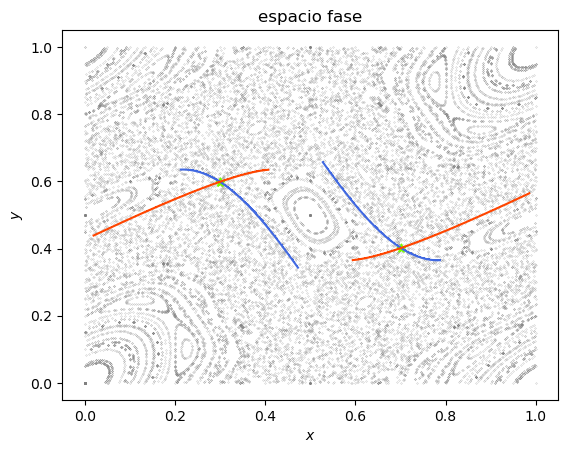

In [189]:
x1 = BigFloat(-0.16)
x2 = BigFloat(0.16)
x3 = BigFloat(-0.19)
x4 = BigFloat(0.19)
delta1 = BigFloat(2.0e-3)
GraficarEstandarMap(Estandar34)
evaluar(Wu34BF, [x1,x2],delta1,periodo2E34BF,"royalblue")
evaluar(Ws34BF, [x3,x4],delta1,periodo2E34BF,"orangered")
evaluar(Wu34BFa, [x1,x2],delta1,periodo2E34BF,"royalblue")
evaluar(Ws34BFa, [x3,x4],delta1,periodo2E34BF,"orangered")

scatter(listaper234BF[1],listaper234BF[2],marker ="*",color="lawngreen")
savefig("estandarp2k13var.pdf", dpi=300)